In [2]:
import pandas as pd
import numpy as np
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential

In [90]:
df = pd.read_csv("Churn_Modelling.csv")

In [91]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [92]:
#checking null values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [93]:
#checking duplicated values
df.duplicated().sum()

0

In [94]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [95]:
#Converting categorical columns to numerical columns
df['Geography'].replace(['France','Spain','Germany'],[0,1,2],inplace=True)
df['Gender'].replace(['Male','Female'],[0,1],inplace=True)
df = df.drop(columns = ['Surname','RowNumber'])

In [96]:
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,1,1,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,1,1,43,2,125510.82,1,1,1,79084.10,0


In [97]:
#getting x and y variables
x = df.drop(columns=['Exited'])
y = df['Exited']

In [98]:
x.shape

(10000, 11)

In [99]:
y.shape

(10000,)

In [100]:
#imprting train test split
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.2, random_state=100)

In [101]:
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((8000, 11), (2000, 11), (8000,), (2000,))

In [102]:
#Scaling data
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [145]:
train_x_scale = scale.fit_transform(train_x)
test_x_scale = scale.transform(test_x)

In [146]:
#importing Tensorflow libraries
from tensorflow.keras.layers import Dense

In [147]:
#Model Building
model = Sequential()
model.add(Dense(3,activation='sigmoid',input_dim=11))
model.add(Dense(1,activation='sigmoid'))

In [148]:
#model compile
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [149]:
#Fitting model
hist = model.fit(train_x_scale,train_y,epochs=10)

Epoch 1/10
250/250 [==============================] - 2s 3ms/step - loss: 0.6808 - accuracy: 0.5702
Epoch 2/10
250/250 [==============================] - 1s 3ms/step - loss: 0.5359 - accuracy: 0.7984
Epoch 3/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4757 - accuracy: 0.8004
Epoch 4/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4524 - accuracy: 0.7981
Epoch 5/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4421 - accuracy: 0.7986
Epoch 6/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4364 - accuracy: 0.7999
Epoch 7/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4326 - accuracy: 0.8035
Epoch 8/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4299 - accuracy: 0.8066
Epoch 9/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4279 - accuracy: 0.8081
Epoch 10/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4263 - accuracy: 0.8100

In [150]:
hist.history

{'loss': [0.6808463931083679,
  0.5359311699867249,
  0.4757198393344879,
  0.4524484872817993,
  0.4421415627002716,
  0.4364234507083893,
  0.43260228633880615,
  0.42994004487991333,
  0.42789655923843384,
  0.4262985587120056],
 'accuracy': [0.5702499747276306,
  0.7983750104904175,
  0.8003749847412109,
  0.7981250286102295,
  0.7986249923706055,
  0.799875020980835,
  0.8034999966621399,
  0.8066250085830688,
  0.8081250190734863,
  0.8100000023841858]}

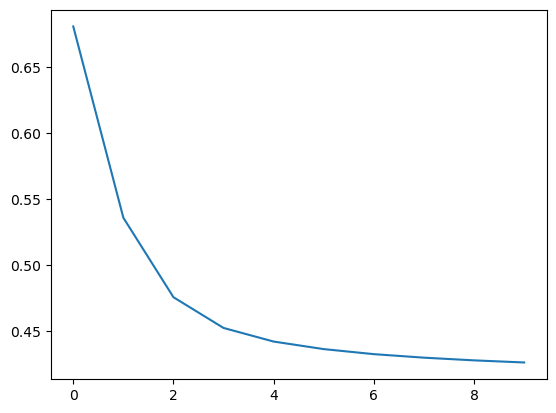

In [151]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.show()

In [152]:
model.layers[0].get_weights()

[array([[ 3.5615847e-02,  1.1838487e-01, -2.2157984e-02],
        [-1.4486249e-01,  2.2137259e-01, -9.9609777e-02],
        [ 6.0925442e-01, -7.0155841e-01, -1.1947053e-01],
        [ 5.2894056e-01, -5.4820871e-01, -7.2158746e-02],
        [ 1.4263338e+00, -1.0163590e+00, -1.6665220e+00],
        [-4.6554390e-02,  2.5906056e-01, -4.5954216e-02],
        [ 1.2417948e-01, -1.4790338e-01, -6.1842471e-01],
        [-7.2573125e-02,  2.0840381e-01, -1.3563393e-01],
        [ 2.6924685e-01, -1.3825702e-03,  2.2768778e-01],
        [-2.8094989e-01,  9.7649288e-01,  6.1515957e-01],
        [-4.2763576e-02, -2.0235534e-01, -3.5508018e-02]], dtype=float32),
 array([-0.40972787,  0.74975425,  0.66206574], dtype=float32)]

In [153]:
result = model.predict(test_x_scale)

63/63 [==============================] - 0s 2ms/step


In [154]:
result

array([[0.12431625],
       [0.16045219],
       [0.19872397],
       ...,
       [0.10718784],
       [0.1452293 ],
       [0.09626146]], dtype=float32)

In [155]:
y_pred = np.where(model.predict(test_x_scale)>0.5,1,0)

63/63 [==============================] - 0s 2ms/step


In [156]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [157]:
#importing accuracy score
from sklearn.metrics import accuracy_score

In [158]:
accuracy_score(test_y,y_pred)

0.8005

<b> Since the Accuracy is 80% we will try to improve the accuracy of the model </b>

In [159]:
#Training and fitting the model 

In [161]:
#Model Building
model = Sequential()
model.add(Dense(3,activation='relu',input_dim=11))
model.add(Dense(3,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [162]:
#model compile
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [163]:
#Fitting model
hist = model.fit(train_x_scale,train_y,epochs=10)

Epoch 1/10
250/250 [==============================] - 2s 3ms/step - loss: 0.6740 - accuracy: 0.6329
Epoch 2/10
250/250 [==============================] - 1s 3ms/step - loss: 0.5436 - accuracy: 0.7949
Epoch 3/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4937 - accuracy: 0.8012
Epoch 4/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4695 - accuracy: 0.7986
Epoch 5/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4525 - accuracy: 0.7999
Epoch 6/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4393 - accuracy: 0.7999
Epoch 7/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4309 - accuracy: 0.8039
Epoch 8/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4253 - accuracy: 0.8079
Epoch 9/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4204 - accuracy: 0.8101
Epoch 10/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4158 - accuracy: 0.8136

In [164]:
hist.history

{'loss': [0.6740232110023499,
  0.5436486601829529,
  0.49366751313209534,
  0.46954643726348877,
  0.45249027013778687,
  0.4392712712287903,
  0.4309379458427429,
  0.4252934455871582,
  0.42040860652923584,
  0.41581037640571594],
 'accuracy': [0.6328750252723694,
  0.7948750257492065,
  0.8012499809265137,
  0.7986249923706055,
  0.799875020980835,
  0.799875020980835,
  0.8038750290870667,
  0.8078749775886536,
  0.8101249933242798,
  0.8136249780654907]}

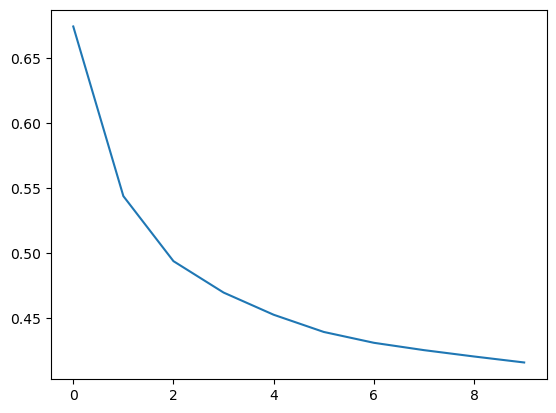

In [165]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.show()

In [166]:
model.layers[0].get_weights()

[array([[-0.21825679, -0.23561803,  0.12900929],
        [-0.12278617,  0.01444723,  0.02061381],
        [ 0.40793675, -0.17221433,  0.20755616],
        [-0.02099148, -0.5143236 ,  0.00244004],
        [ 0.6080284 , -0.7817366 , -0.27912998],
        [ 0.02517645,  0.10646334,  0.01558071],
        [ 0.611726  ,  0.25343397, -0.450288  ],
        [ 0.81491137,  0.20247795,  0.7653545 ],
        [-0.02949933, -0.07014724,  0.10848593],
        [-0.60167295, -0.0398178 ,  0.2197866 ],
        [ 0.20317242,  0.02692168,  0.01740127]], dtype=float32),
 array([-0.24270031,  0.26853076,  0.3486099 ], dtype=float32)]

In [167]:
result_1 = model.predict(test_x_scale)

63/63 [==============================] - 0s 2ms/step


In [168]:
result_1

array([[0.046668  ],
       [0.2586734 ],
       [0.32416916],
       ...,
       [0.0476841 ],
       [0.08179723],
       [0.03376932]], dtype=float32)

In [170]:
y_pred = np.where(model.predict(test_x_scale)>0.5,1,0)

63/63 [==============================] - 0s 2ms/step


In [171]:
accuracy_score(test_y,y_pred)

0.81

<b> So the accuracy score increased by 1% </b>